In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
import pandas as pd
import numpy as np

In [53]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
else:
    print('Unknown system')
    
plt.style.use('ggplot')
    
plt.rcParams['axes.unicode_minus'] = False #graph에서 마이너스 방지

# data loading

### X값 로딩

In [67]:
clima=pd.read_csv('../data/adjusted_climate.csv')
clima

,year_local,area,year,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,1991_강원도,강원도,1991,22.827957,24.297133,18.242593,11.864875,7.723704,-1.206093,-4.854480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1991_경기도,경기도,1991,25.051613,25.911828,20.493023,13.147312,8.160000,-0.915054,-4.255914,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1991_경상남도,경상남도,1991,26.101075,27.240502,21.902222,15.447670,11.091111,3.099642,1.022581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1991_경상북도,경상북도,1991,24.853666,26.011144,20.131818,13.698534,9.552424,1.166276,-1.537243,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1991_광주광역시,광주광역시,1991,26.590323,27.625806,22.496667,15.925806,11.573333,3.732258,1.438710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2019_전라남도,전라남도,2019,26.406048,26.978455,21.398333,14.785887,9.688333,4.221023,1.875893,...,8.630000,9.811694,7.856667,10.423864,10.804018,10.716518,12.120982,9.909375,9.979435,8.046250
460,2019_전라북도,전라북도,2019,26.887500,27.388710,20.442917,12.579839,6.805000,1.428977,-0.809375,...,7.307500,7.349597,5.769583,6.481818,6.341964,6.934821,8.884375,7.380357,7.684274,6.426582
461,2019_제주도,제주도,2019,25.447312,28.087097,23.584444,17.760215,14.137778,9.384848,6.883333,...,9.993333,10.611828,8.973333,11.909091,11.352381,10.565476,11.692857,9.042857,8.007527,7.308889
462,2019_충청남도,충청남도,2019,24.305161,27.466452,20.138667,12.011613,7.014000,0.330909,-1.005714,...,6.473333,7.002581,5.654667,6.339091,6.110714,6.544286,8.260000,7.385000,7.576129,6.124000


### y 값 로딩

In [68]:
onion=pd.read_csv('../data/onion_unit_output.csv')
onion

,year_local,area,year,10a당 생산량 (kg)
0,1981_부산광역시,부산광역시,1981,-
1,1982_부산광역시,부산광역시,1982,-
2,1983_부산광역시,부산광역시,1983,3800
3,1984_부산광역시,부산광역시,1984,-
4,1985_부산광역시,부산광역시,1985,4093
...,...,...,...,...
580,2015_제주도,제주도,2015,6552
581,2016_제주도,제주도,2016,6458
582,2017_제주도,제주도,2017,6945
583,2018_제주도,제주도,2018,6740


#### output 값 속 na 처리

In [69]:
onion.rename(columns={'10a당 생산량 (kg)':'output'}, inplace=True)
onion

,year_local,area,year,output
0,1981_부산광역시,부산광역시,1981,-
1,1982_부산광역시,부산광역시,1982,-
2,1983_부산광역시,부산광역시,1983,3800
3,1984_부산광역시,부산광역시,1984,-
4,1985_부산광역시,부산광역시,1985,4093
...,...,...,...,...
580,2015_제주도,제주도,2015,6552
581,2016_제주도,제주도,2016,6458
582,2017_제주도,제주도,2017,6945
583,2018_제주도,제주도,2018,6740


In [70]:
onion["output"].replace('-',np.nan,inplace=True)
onion.isna().sum()

year_local     0
area           0
year           0
output        70
dtype: int64

In [71]:
onion.dropna(inplace=True)
onion.isna().sum()

year_local    0
area          0
year          0
output        0
dtype: int64

# clima & onion DF join

In [72]:
col=onion.columns
col

Index(['year_local', 'area', 'year', 'output'], dtype='object')

In [73]:
df=pd.merge(onion,
            clima,
            on=[col[0],col[1],col[2]])
df

,year_local,area,year,output,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,1991_부산광역시,부산광역시,1991,4770,25.419355,28.261290,22.693333,17.974194,13.870000,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992_부산광역시,부산광역시,1992,5825,23.922581,23.725806,22.613333,17.145161,11.160000,7.612903,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1993_부산광역시,부산광역시,1993,6114,24.396774,24.764516,22.683333,16.925806,11.160000,7.045161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1994_부산광역시,부산광역시,1994,4914,21.838710,22.816129,21.700000,16.541935,12.230000,5.145161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1995_부산광역시,부산광역시,1995,5049,27.858065,28.083871,23.113333,17.890323,13.820000,6.861290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2015_제주도,제주도,2015,6552,18.645161,18.758065,17.715000,14.670732,10.738333,5.523387,...,7.404167,8.280488,8.219167,11.789516,10.566942,9.539286,8.006452,8.281667,7.029839,6.825000
419,2016_제주도,제주도,2016,6458,18.095902,18.799194,15.954167,14.166129,11.287500,7.399194,...,7.526667,7.973387,8.269167,9.202419,9.523387,10.748276,7.863710,8.256667,7.323387,6.730833
420,2017_제주도,제주도,2017,6945,25.326804,27.969892,23.692222,20.630952,13.033333,9.794624,...,9.057778,11.707143,12.233333,12.480645,12.519355,13.680952,11.632258,10.632222,9.050538,8.014444
421,2018_제주도,제주도,2018,6740,28.040860,28.181720,23.865556,19.283871,12.992222,7.229032,...,10.150000,11.339785,10.760000,13.516129,13.189247,12.511905,11.002222,10.703333,9.056044,8.804444


# Scaling 

In [74]:
df=df.iloc[:,3:]
df_columns = df.columns.tolist()
df

,output,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,4770,25.419355,28.261290,22.693333,17.974194,13.870000,5.900000,3.158065,3.353571,8.335484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5825,23.922581,23.725806,22.613333,17.145161,11.160000,7.612903,5.032258,4.962069,9.325806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,6114,24.396774,24.764516,22.683333,16.925806,11.160000,7.045161,3.448387,5.942857,8.187097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4914,21.838710,22.816129,21.700000,16.541935,12.230000,5.145161,3.880645,5.196429,7.390323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5049,27.858065,28.083871,23.113333,17.890323,13.820000,6.861290,2.909677,5.621429,9.045161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,6552,18.645161,18.758065,17.715000,14.670732,10.738333,5.523387,5.813223,5.457143,7.720968,...,7.404167,8.280488,8.219167,11.789516,10.566942,9.539286,8.006452,8.281667,7.029839,6.825000
419,6458,18.095902,18.799194,15.954167,14.166129,11.287500,7.399194,4.473387,5.337931,7.605645,...,7.526667,7.973387,8.269167,9.202419,9.523387,10.748276,7.863710,8.256667,7.323387,6.730833
420,6945,25.326804,27.969892,23.692222,20.630952,13.033333,9.794624,6.861290,7.041667,9.821505,...,9.057778,11.707143,12.233333,12.480645,12.519355,13.680952,11.632258,10.632222,9.050538,8.014444
421,6740,28.040860,28.181720,23.865556,19.283871,12.992222,7.229032,5.231183,5.772619,11.523333,...,10.150000,11.339785,10.760000,13.516129,13.189247,12.511905,11.002222,10.703333,9.056044,8.804444


In [75]:
df_columns

['output',
 '평균기온 7월',
 '평균기온 8월',
 '평균기온 9월',
 '평균기온 10월',
 '평균기온 11월',
 '평균기온 12월',
 '평균기온 1월',
 '평균기온 2월',
 '평균기온 3월',
 '평균기온 4월',
 '평균기온 5월',
 '평균기온 6월',
 '최고기온 7월',
 '최고기온 8월',
 '최고기온 9월',
 '최고기온 10월',
 '최고기온 11월',
 '최고기온 12월',
 '최고기온 1월',
 '최고기온 2월',
 '최고기온 3월',
 '최고기온 4월',
 '최고기온 5월',
 '최고기온 6월',
 '최저기온 7월',
 '최저기온 8월',
 '최저기온 9월',
 '최저기온 10월',
 '최저기온 11월',
 '최저기온 12월',
 '최저기온 1월',
 '최저기온 2월',
 '최저기온 3월',
 '최저기온 4월',
 '최저기온 5월',
 '최저기온 6월',
 '강수량 7월',
 '강수량 8월',
 '강수량 9월',
 '강수량 10월',
 '강수량 11월',
 '강수량 12월',
 '강수량 1월',
 '강수량 2월',
 '강수량 3월',
 '강수량 4월',
 '강수량 5월',
 '강수량 6월',
 '일조시간 7월',
 '일조시간 8월',
 '일조시간 9월',
 '일조시간 10월',
 '일조시간 11월',
 '일조시간 12월',
 '일조시간 1월',
 '일조시간 2월',
 '일조시간 3월',
 '일조시간 4월',
 '일조시간 5월',
 '일조시간 6월',
 '일사량 7월',
 '일사량 8월',
 '일사량 9월',
 '일사량 10월',
 '일사량 11월',
 '일사량 12월',
 '일사량 1월',
 '일사량 2월',
 '일사량 3월',
 '일사량 4월',
 '일사량 5월',
 '일사량 6월',
 '습도 7월',
 '습도 8월',
 '습도 9월',
 '습도 10월',
 '습도 11월',
 '습도 12월',
 '습도 1월',
 '습도 2월',
 '습도 3월',
 '습도 4월',
 '습도 5월',
 '습도 6월',
 '운량 7월'

In [76]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,
                         columns=df_columns)
df_scaled

,output,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,0.509180,0.604395,0.921201,0.776918,0.742803,0.908069,0.747161,0.721479,0.537789,0.655419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.621798,0.480868,0.481551,0.768300,0.662545,0.700460,0.857813,0.838804,0.661406,0.761020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.652647,0.520003,0.582239,0.775841,0.641310,0.700460,0.821137,0.739653,0.736781,0.639595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.524552,0.308889,0.393371,0.669910,0.604148,0.782431,0.698399,0.766713,0.679417,0.554633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.538962,0.805658,0.904003,0.822163,0.734683,0.904239,0.809259,0.705930,0.712079,0.731094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.699402,0.045330,0.000000,0.240623,0.422999,0.668156,0.722832,0.887693,0.699453,0.589890,...,0.602782,0.679222,0.588204,0.747813,0.658972,0.658855,0.540211,0.620815,0.593478,0.636858
419,0.689368,0.000000,0.003987,0.050936,0.374150,0.710227,0.844007,0.803819,0.690291,0.577593,...,0.612754,0.654032,0.591782,0.583713,0.593895,0.742357,0.530580,0.618941,0.618260,0.628072
420,0.741354,0.596757,0.892954,0.884524,1.000000,0.843973,0.998750,0.953302,0.821227,0.813878,...,0.737404,0.960300,0.875477,0.791652,0.780728,0.944910,0.784851,0.797018,0.764070,0.747849
421,0.719471,0.820744,0.913488,0.903196,0.869591,0.840824,0.833015,0.851257,0.723698,0.995351,...,0.826323,0.930167,0.770038,0.857333,0.822504,0.864167,0.742342,0.802349,0.764535,0.821566


# x, y 분리

In [77]:
x=df_scaled.iloc[:,1:]
x

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,0.604395,0.921201,0.776918,0.742803,0.908069,0.747161,0.721479,0.537789,0.655419,0.652595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.480868,0.481551,0.768300,0.662545,0.700460,0.857813,0.838804,0.661406,0.761020,0.735037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.520003,0.582239,0.775841,0.641310,0.700460,0.821137,0.739653,0.736781,0.639595,0.666016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.308889,0.393371,0.669910,0.604148,0.782431,0.698399,0.766713,0.679417,0.554633,0.853523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.805658,0.904003,0.822163,0.734683,0.904239,0.809259,0.705930,0.712079,0.731094,0.656813,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.045330,0.000000,0.240623,0.422999,0.668156,0.722832,0.887693,0.699453,0.589890,0.376320,...,0.602782,0.679222,0.588204,0.747813,0.658972,0.658855,0.540211,0.620815,0.593478,0.636858
419,0.000000,0.003987,0.050936,0.374150,0.710227,0.844007,0.803819,0.690291,0.577593,0.439302,...,0.612754,0.654032,0.591782,0.583713,0.593895,0.742357,0.530580,0.618941,0.618260,0.628072
420,0.596757,0.892954,0.884524,1.000000,0.843973,0.998750,0.953302,0.821227,0.813878,0.872311,...,0.737404,0.960300,0.875477,0.791652,0.780728,0.944910,0.784851,0.797018,0.764070,0.747849
421,0.820744,0.913488,0.903196,0.869591,0.840824,0.833015,0.851257,0.723698,0.995351,0.777088,...,0.826323,0.930167,0.770038,0.857333,0.822504,0.864167,0.742342,0.802349,0.764535,0.821566


In [80]:
y=df_scaled.loc[:,'output']
y

0      0.509180
1      0.621798
2      0.652647
3      0.524552
4      0.538962
         ...   
418    0.699402
419    0.689368
420    0.741354
421    0.719471
422    0.840628
Name: output, Length: 423, dtype: float64

# train, test split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3)
print("X_train: {0}\nX_test: {1}\n\ny_train: {2}\ny_test:{3}".format(X_train.shape,
                                                                     X_test.shape,
                                                                     y_train.shape,
                                                                     y_test.shape))

X_train: (296, 120)
X_test: (127, 120)

y_train: (296,)
y_test:(127,)


# x, y를 이용한 ElasticNet

In [82]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, 
                                                                        score, 
                                                                        mse, 
                                                                        np.sqrt(mse)))

Alpha:0.0001, R2:0.51, MSE:0.01, RMSE:0.12
Alpha:0.0010, R2:0.41, MSE:0.02, RMSE:0.13
Alpha:0.0100, R2:0.27, MSE:0.02, RMSE:0.15
Alpha:0.1000, R2:0.00, MSE:0.03, RMSE:0.17
Alpha:0.3000, R2:0.00, MSE:0.03, RMSE:0.17
Alpha:0.5000, R2:0.00, MSE:0.03, RMSE:0.17
Alpha:0.7000, R2:0.00, MSE:0.03, RMSE:0.17
Alpha:1.0000, R2:0.00, MSE:0.03, RMSE:0.17


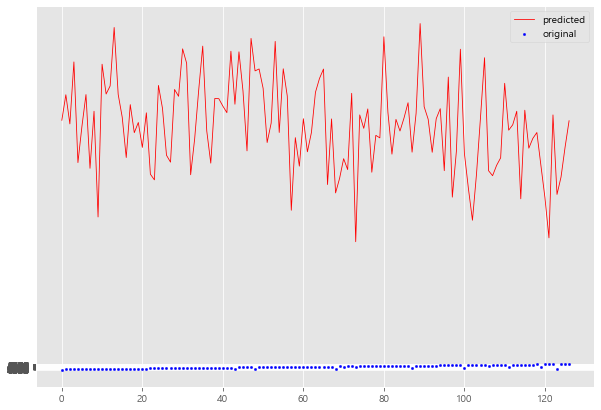

In [86]:
x_ax = range(len(xtest))
plt.figure(figsize=(10,7))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# xtrain, ytrain를 이용한 ElasticNetCV - cross_validation

In [84]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print(f'model.alpha_ : {model.alpha_}')
print(f'model.intercept_: {model.intercept_}')

model.alpha_ : 0.01
model.intercept_: 0.38999409994804873


In [85]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, 
                                                     mse, 
                                                     np.sqrt(mse)))

R2:0.255, MSE:0.02, RMSE:0.14


# from Jisoo code

# MSE 계산 함수 

In [87]:
#MSE 계산 함수 
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

# 변수 추출 함수

In [88]:
def valid_columns (X_train, y_train, X_test, y_test, model):
    variable = X_train.columns
    coef = pd.DataFrame(pd.Series(model.coef_, variable).sort_values())
    valid_coef = coef[coef.values != 0]
    return valid_coef.index

In [89]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = Lasso(alpha, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table = rmse_table.sort_values('rmse')
rmse_table.head()

,alpha,rmse
1,0.0005,0.139679
2,0.0010,0.141181
3,0.0050,0.141268
4,0.0100,0.148472
0,0.0001,0.154633


In [90]:
model = Lasso(alpha=rmse_table.iloc[0,0], random_state = 0)

print(' best alpha:', rmse_table.iloc[0,0])
print('\n 테스트 RMSE 변수:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))


rmse_lasso = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
climate_valid_columns_lasso = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.0005

 테스트 RMSE 변수: (0.12951306114465602, 0.13967865603968432)

 추출 변수: Index(['운량 6월', '일사량 10월', '습도 11월', '습도 12월', '최저기온 5월', '평균기온 7월', '습도 1월',
       '일조시간 6월', '적설량 3월', '강수량 5월', '일조시간 2월', '일사량 9월', '강수량 7월', '운량 3월',
       '습도 7월', '강수량 4월', '적설량 1월', '일조시간 8월', '적설량 12월', '최고기온 2월', '일사량 11월',
       '최고기온 10월', '강수량 8월', '일조시간 4월', '일조시간 5월', '일사량 3월', '강수량 1월',
       '평균기온 2월', '최고기온 8월', '습도 3월', '강수량 12월', '순간최대풍속 7월', '최고기온 11월',
       '최고기온 12월', '순간최대풍속 3월', '운량 12월', '최고기온 3월'],
      dtype='object')

 추출 변수 길이: 37


# GridSearch, Cross Validation 적용한 Lasso 모델

In [92]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
#param_grid = {'alpha': np.logspace(-4, -0.01, 30).tolist()}

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_squared_error', 
                                 return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_lasso.score(X_test, y_test))))
print("최적 매개변수:", grid_search_lasso.best_params_)
# print("최고 교차 검증 점수:{}", np.sqrt(-(lasso_regressor.best_score_)))
print("최고 성능 모델:", grid_search_lasso.best_estimator_)

rmse_lasso_cv =  np.sqrt(-(grid_search_lasso.score(X_test, y_test)))

테스트 RMSE 점수: 0.14118086430093296
최적 매개변수: {'alpha': 0.001}
최고 성능 모델: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [94]:
variable = x.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_lasso.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
climate_valid_columns_lasso_cv = valid_coef.index.values 
valid_coef

,0
습도 11월,-0.102428
일사량 10월,-0.064633
습도 12월,-0.064339
일사량 9월,-0.060080
일조시간 6월,-0.046364
운량 6월,-0.039469
습도 1월,-0.039468
최저기온 5월,-0.032112
일조시간 2월,-0.003026
최고기온 10월,0.007768


# Traning:Validation (70:30) 한 번 적용한 ELASTICNET 모델

In [95]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
#alphas = np.logspace(-4, -0.01, 30)

rmse = []
for alpha in alphas:
    model = ElasticNet(alpha,l1_ratio=0.5, random_state = 0)
    rmse.append(calc_metrics(X_train, y_train, X_test, y_test, model)[1])

rmse_table = pd.DataFrame({'alpha':alphas, 'rmse':rmse})
rmse_table = rmse_table.sort_values('rmse')
rmse_table.head()

,alpha,rmse
2,0.0010,0.139573
3,0.0050,0.141016
4,0.0100,0.141681
1,0.0005,0.143264
0,0.0001,0.160516


In [96]:
model = ElasticNet(alpha=rmse_table.iloc[0,0], l1_ratio=0.5, random_state = 0)

print(' best alpha:', rmse_table.iloc[0,0])
print('\n Training & Test RMSE 값:', calc_metrics(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수:', valid_columns(X_train, y_train, X_test, y_test, model))
print('\n 추출 변수 길이:', len(valid_columns(X_train, y_train, X_test, y_test, model)))

rmse_elastic = calc_metrics(X_train, y_train, X_test, y_test, model)[1]
climate_valid_columns_elasticnet = valid_columns(X_train, y_train, X_test, y_test, model).values.tolist()

 best alpha: 0.001

 Training & Test RMSE 값: (0.13030729052018392, 0.13957256369557508)

 추출 변수: Index(['운량 6월', '습도 11월', '습도 12월', '일사량 10월', '최저기온 5월', '습도 1월', '평균기온 7월',
       '일조시간 6월', '적설량 3월', '강수량 5월', '일사량 9월', '일조시간 2월', '강수량 7월', '운량 4월',
       '운량 3월', '습도 7월', '습도 6월', '일조시간 8월', '일사량 11월', '일사량 3월', '적설량 12월',
       '일조시간 4월', '평균기온 2월', '순간최대풍속 5월', '평균기온 12월', '강수량 8월', '일조시간 5월',
       '최고기온 10월', '최고기온 2월', '최고기온 8월', '강수량 1월', '습도 3월', '강수량 12월',
       '순간최대풍속 7월', '순간최대풍속 3월', '최고기온 11월', '최고기온 12월', '운량 12월', '최고기온 3월'],
      dtype='object')

 추출 변수 길이: 39


# Cross Validation 적용한 ELASTICNET 모델

In [97]:
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search_elastic= GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic.fit(X_train,y_train)

print("테스트 RMSE 점수:", np.sqrt(-(grid_search_elastic.score(X_test, y_test))))
print("최적 매개변수:", grid_search_elastic.best_params_)
print("최고 교차 검증 점수:", np.sqrt(-(grid_search_elastic.best_score_)))
print("최고 성능 모델:", grid_search_elastic.best_estimator_)

rmse_elastic_cv =  np.sqrt(-(grid_search_elastic.score(X_test, y_test)))

테스트 RMSE 점수: 0.14101580334892905
최적 매개변수: {'alpha': 0.005}
최고 교차 검증 점수: 0.14832031096241843
최고 성능 모델: ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [99]:
variable = x.columns.tolist()
coef = pd.DataFrame(pd.Series(grid_search_elastic.best_estimator_.coef_, variable).sort_values())
valid_coef = coef[coef.values != 0]
climate_valid_columns_elasticnet_cv = valid_coef.index.values 
valid_coef

,0
일사량 9월,-0.067719
습도 1월,-0.046700
일사량 10월,-0.031508
습도 11월,-0.028759
습도 12월,-0.018520
강수량 3월,0.003294
순간최대풍속 3월,0.007597
순간최대풍속 10월,0.007992
최고기온 2월,0.011812
평균기온 2월,0.016894


# 최적의 변수 추출

In [100]:
print(rmse_lasso)
print(rmse_lasso_cv)

print(rmse_elastic)
print(rmse_elastic_cv)

0.13967865603968432
0.14118086430093296
0.13957256369557508
0.14101580334892905


In [103]:
print('Lasso 을 통해 선별된 기후 변수:\n\n', climate_valid_columns_lasso)
print('\nLasso CV 을 통해 선별된 기후 변수:\n\n', climate_valid_columns_lasso_cv)

print('\nElasticnet을 통해 선별된 기후 변수:\n\n', climate_valid_columns_elasticnet)
print('\nElasticnet CV을 통해 선별된 기후 변수:\n\n', climate_valid_columns_elasticnet_cv)

Lasso 을 통해 선별된 기후 변수:

 ['운량 6월', '일사량 10월', '습도 11월', '습도 12월', '최저기온 5월', '평균기온 7월', '습도 1월', '일조시간 6월', '적설량 3월', '강수량 5월', '일조시간 2월', '일사량 9월', '강수량 7월', '운량 3월', '습도 7월', '강수량 4월', '적설량 1월', '일조시간 8월', '적설량 12월', '최고기온 2월', '일사량 11월', '최고기온 10월', '강수량 8월', '일조시간 4월', '일조시간 5월', '일사량 3월', '강수량 1월', '평균기온 2월', '최고기온 8월', '습도 3월', '강수량 12월', '순간최대풍속 7월', '최고기온 11월', '최고기온 12월', '순간최대풍속 3월', '운량 12월', '최고기온 3월']

Lasso CV 을 통해 선별된 기후 변수:

 ['습도 11월' '일사량 10월' '습도 12월' '일사량 9월' '일조시간 6월' '운량 6월' '습도 1월' '최저기온 5월'
 '일조시간 2월' '최고기온 10월' '순간최대풍속 5월' '평균기온 2월' '강수량 3월' '일조시간 8월' '일조시간 5월'
 '순간최대풍속 12월' '운량 12월' '강수량 12월' '평균기온 12월' '순간최대풍속 7월' '순간최대풍속 3월'
 '최고기온 11월' '최고기온 12월' '최고기온 3월']

Elasticnet을 통해 선별된 기후 변수:

 ['운량 6월', '습도 11월', '습도 12월', '일사량 10월', '최저기온 5월', '습도 1월', '평균기온 7월', '일조시간 6월', '적설량 3월', '강수량 5월', '일사량 9월', '일조시간 2월', '강수량 7월', '운량 4월', '운량 3월', '습도 7월', '습도 6월', '일조시간 8월', '일사량 11월', '일사량 3월', '적설량 12월', '일조시간 4월', '평균기온 2월', '순간최대풍속 5월', '평균기온 12월', '강수량 8월', '일조시간 5

In [106]:
climate_valid_columns_lasso == climate_valid_columns_lasso_cv

array(False)

In [105]:
climate_valid_columns_elasticnet == climate_valid_columns_elasticnet_cv

False